In [16]:
from scipy import stats
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

### 1 задача
Теперь рассчитаем p-уровень значимости для нашего примера с игральной костью. Напомню, что мы получили следующие значения наблюдаемых частот (от единички до шестерки):

10, 10, 10, 5, 10, 1510,10,10,5,10,15 

Проверьте нулевую гипотезу о том, что эмпирическое распределение частот не отличается от равномерного. В поле для ответа введите получившийся p-уровень значимости. 

In [1]:
# Найдем значение хи-квадрат для представленных наблюдений:

observations = [10, 10, 10, 5, 10, 15]
exp = sum(observations) / len(observations)
cal_chi2 = 0
for obs in observations:
    cal_chi2 += (obs-exp)**2/exp
print(cal_chi2)

5.0


In [2]:
exp

10.0

In [8]:
# Найдем приближенное распределения хи-квадрат для игральной кости:

list_of_chi2_cdf = []
for i in range(10000):
    # кол-во выпадений каждой грани в наших подбрасываниях
    res = {}
    for i in range(60):
        x = np.random.choice([1,2,3,4,5,6])
        res[x] = res.get(x, 0) + 1
    list_of_chi2_cdf.append(sum([(i-10)**2/10 for i in res.values()]))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


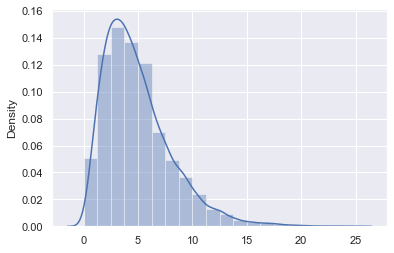

In [9]:
# Посмотрим наше получившееся распределение хи-квадрат:

sns.set()
sns.distplot(list_of_chi2_cdf, kde=True, bins=20);

In [10]:
# И значение p-value в нашем неточном эксперименте (решить задачу вам это значение не позволит):

p_count = sum(1 for i in list_of_chi2_cdf if i >= cal_chi2)
print(f'{p_count=}, {p_count/10000=:.4f}')

p_count=4198, p_count/10000=0.4198


In [19]:
# Ну и конечно есть простой путь:

stats.chisquare([10, 10, 10, 5, 10, 15])

Power_divergenceResult(statistic=5.0, pvalue=0.4158801869955079)

### 2 задача

Вернемся к нашему примеру с политическими партиями! Проверьте гипотезу о том, что в ГС нет никаких различий в предпочтениях трех партий. Введите в поле для ответа получившееся значение статистики хи-квадрат с точностью хотя бы до одной цифры после запятой.
Данные - 3 партии и число избирателей 10, 30 и 50.

In [20]:
stats.chisquare([10, 30, 50])

Power_divergenceResult(statistic=26.666666666666668, pvalue=1.61959679231261e-06)

In [21]:
# Найдем значение хи-квадрат для представленных наблюдений:

observations = [10, 30, 50]
exp = sum(observations) / len(observations)
cal_chi2 = 0
for obs in observations:
    cal_chi2 += (obs-exp)**2/exp
print(cal_chi2)

26.666666666666668


- Отвергаем нулевую гипотезу о том, что число сторонников каждой из трех партий в генеральной совокупности одинаково.
- Принимаем альтернативную гипотезу, что распределение предпочтений избирателей отличается от равномерного.

### 3 задача

Недавно я пришел на лекцию в Институт биоинформатики и обнаружил, что в группе различное число студентов женского и мужского пола: 15 юношей и 9 девушек. Возможно, кого-то это и могло бы оставить равнодушным, а я вот сразу взял лист бумаги и ручку, чтобы проверить гипотезу о том, что распределение частот девушек и юношей не отличается от равномерного в генеральной совокупности биоинформатиков!

Давайте сверим наши результаты. Введите в поле для ответа получившийся у вас p-уровень значимости.

In [22]:
stats.chisquare([15, 9])

Power_divergenceResult(statistic=1.5, pvalue=0.22067136191984324)

### 4 задача


В 2013 году Эдвард Сноуден передал СМИ секретную информацию АНБ, касающуюся слежки американских спецслужб за информационными коммуникациями между гражданами. Однако ﻿его поступок вызвал неоднозначную реакцию в обществе. Исследовательский центр USA TODAY провел опрос 1500 граждан США с целью выяснить, воспринимают ли они поступок Сноудена как положительный или отрицательный. 53% опрошенных респондентов оценили разоблачение положительно.

При помощи теста хи-квадрат проверьте нулевую гипотезу о том, что в генеральной совокупности распределение отношения к поступку Сноудена является равномерным, то есть 50 на 50.

In [24]:
stats.chisquare([1500*0.53, 1500*0.47])

Power_divergenceResult(statistic=5.4, pvalue=0.02013675155034633)

pvalue < 0.05 - отвергаем нулевую гипотезу